### Introducción al Proyecto

En este proyecto, nuestro objetivo es predecir el precio de diferentes modelos de laptops utilizando un conjunto de datos que contiene diversas características de estos dispositivos. Para lograrlo, emplearemos técnicas de Machine Learning, buscando optimizar nuestro modelo para obtener las métricas de error absoluto medio (MAE) más bajas posibles. El proceso se desarrollará siguiendo una serie de pasos bien definidos que abarcan desde la exploración y limpieza de datos hasta la construcción, evaluación y optimización de los modelos.

### Objetivos Específicos

1. **Exploración y Limpieza de Datos**: Entender la estructura del dataset, identificar y manejar valores faltantes, y realizar las transformaciones necesarias para preparar los datos para el modelado.
2. **Análisis Exploratorio de Datos (EDA)**: Visualizar y analizar las relaciones entre las variables independientes y el precio de las laptops para identificar patrones y características importantes.
3. **Preparación de los Datos**: Transformar y codificar variables categóricas, escalar las características numéricas, y dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
4. **Selección de Modelos**: Probar diferentes algoritmos de Machine Learning y seleccionar los más prometedores en base a su desempeño inicial.
5. **Entrenamiento y Evaluación del Modelo**: Entrenar los modelos seleccionados y evaluar su desempeño utilizando MAE como métrica principal.
6. **Optimización del Modelo**: Ajustar hiperparámetros y realizar técnicas de mejora del modelo para reducir el MAE.
7. **Validación y Pruebas Finales**: Validar el modelo final y realizar pruebas adicionales para asegurarnos de su generalización y robustez.

### Herramientas y Tecnologías

- **Lenguaje de Programación**: Python
- **Bibliotecas**: pandas, numpy, matplotlib, seaborn, scikit-learn, entre otras
- **Entorno de Desarrollo**: Jupyter Notebook o cualquier otro entorno compatible

Al finalizar este proyecto, esperamos desarrollar un modelo predictivo robusto y preciso que pueda estimar los precios de laptops basándose en sus características, con un enfoque particular en minimizar el error absoluto medio (MAE).


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización llamativo
sns.set_theme(style="whitegrid", palette="muted")

import warnings

# Suprimir warnings
warnings.filterwarnings('ignore')

In [9]:


# Cargar el conjunto de datos
train_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Escritorio\competicion kaggel ML\train.csv")

# Mostrar las primeras filas del dataframe para verificar la correcta carga de los datos
train_df.head()


,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [10]:
# Obtener información general del dataframe
train_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [11]:
# Obtener una descripción estadística del dataframe
train_df.describe(include='all')

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,912.000000,912.000000,912,912,912,912.000000,912,912,912,912,912,912,912,912.000000
unique,NaN,NaN,19,475,6,NaN,35,104,8,36,91,9,158,NaN
top,NaN,NaN,Lenovo,Inspiron 3567,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,NaN,208,21,522,NaN,346,142,434,293,199,746,86,NaN
mean,645.091009,666.192982,NaN,NaN,NaN,15.011404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108.122873
std,380.313813,384.873846,NaN,NaN,NaN,1.411744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,714.597741
min,0.000000,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,319.750000,330.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.000000
50%,636.500000,673.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.000000
75%,980.250000,998.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1458.500000


In [12]:
# Eliminar duplicados del dataframe
train_df = train_df.drop_duplicates()

# Verificar si se han eliminado duplicados
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [13]:
# Convertir la columna Weight a numérica
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)

# Verificar la transformación
train_df['Weight'].head()


0    2.36
1    2.00
2    1.20
3    4.42
4    1.26
Name: Weight, dtype: float64

In [14]:
# Extraer tipo de pantalla
train_df['Touchscreen'] = train_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
train_df['Ips'] = train_df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

# Extraer resolución horizontal y vertical
resolution = train_df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
train_df['Resolution_x'] = resolution[0].astype(int)
train_df['Resolution_y'] = resolution[1].astype(int)

# Verificar la transformación
train_df[['Touchscreen', 'Ips', 'Resolution_x', 'Resolution_y']].head()


,Touchscreen,Ips,Resolution_x,Resolution_y
0,0,0,1366,768
1,0,0,1366,768
2,0,0,1920,1080
3,0,1,3840,2160
4,1,0,1920,1080


In [15]:
# Extraer la marca del CPU
train_df['Cpu_Brand'] = train_df['Cpu'].apply(lambda x: x.split()[0])

# Extraer la velocidad del CPU
train_df['Cpu_Speed'] = train_df['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

# Verificar la transformación
train_df[['Cpu_Brand', 'Cpu_Speed']].head()


,Cpu_Brand,Cpu_Speed
0,Intel,2.7
1,Intel,1.1
2,Intel,2.3
3,Intel,2.8
4,Intel,2.4


In [16]:
# Crear columnas indicadoras para las marcas de GPU
train_df['Gpu_Intel'] = train_df['Gpu'].apply(lambda x: 1 if 'Intel' in x else 0)
train_df['Gpu_AMD'] = train_df['Gpu'].apply(lambda x: 1 if 'AMD' in x else 0)
train_df['Gpu_Nvidia'] = train_df['Gpu'].apply(lambda x: 1 if 'Nvidia' in x else 0)

# Verificar la transformación
train_df[['Gpu_Intel', 'Gpu_AMD', 'Gpu_Nvidia']].head()


,Gpu_Intel,Gpu_AMD,Gpu_Nvidia
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [17]:
# Convertir la columna Ram a numérica
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)

# Verificar la transformación
train_df['Ram'].head()


0     8
1     4
2     8
3    16
4     8
Name: Ram, dtype: int32

In [18]:
# Función para extraer tipo de memoria
def extract_memory_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    elif 'Flash' in memory:
        return 'Flash'
    else:
        return 'Unknown'

# Función para extraer la cantidad de almacenamiento en GB
def extract_memory_size(memory):
    size = 0
    for part in memory.split():
        if 'GB' in part:
            size += int(part.replace('GB', ''))
        elif 'TB' in part:
            size += int(float(part.replace('TB', '')) * 1024)
    return size

# Aplicar las funciones a la columna Memory
train_df['Memory_Type'] = train_df['Memory'].apply(extract_memory_type)
train_df['Memory_Size'] = train_df['Memory'].apply(extract_memory_size)

# Verificar la transformación
train_df[['Memory_Type', 'Memory_Size']].head()


,Memory_Type,Memory_Size
0,HDD,1024
1,HDD,1024
2,SSD,256
3,SSD,1280
4,SSD,256


In [19]:
# Agrupar los sistemas operativos en categorías amplias
def categorize_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os:
        return 'MacOS'
    elif 'Linux' in os or 'Ubuntu' in os:
        return 'Linux'
    else:
        return 'Other'

train_df['OpSys_Category'] = train_df['OpSys'].apply(categorize_os)

# Verificar la transformación
train_df[['OpSys', 'OpSys_Category']].head()


,OpSys,OpSys_Category
0,Windows 10,Windows
1,Windows 10,Windows
2,Windows 7,Windows
3,Windows 10,Windows
4,Windows 7,Windows


In [21]:
# Eliminar las columnas id y laptop_ID
train_df = train_df.drop(columns=['id', 'laptop_ID'])

# Verificar que las columnas han sido eliminadas
train_df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Resolution_x,Resolution_y,Cpu_Brand,Cpu_Speed,Gpu_Intel,Gpu_AMD,Gpu_Nvidia,Memory_Type,Memory_Size,OpSys_Category
0,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,...,1366,768,Intel,2.7,0,1,0,HDD,1024,Windows
1,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,...,1366,768,Intel,1.1,1,0,0,HDD,1024,Windows
2,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,...,1920,1080,Intel,2.3,1,0,0,SSD,256,Windows
3,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,...,3840,2160,Intel,2.8,0,0,1,SSD,1280,Windows
4,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,...,1920,1080,Intel,2.4,1,0,0,SSD,256,Windows


## ANALASIS UNIVARIANTE

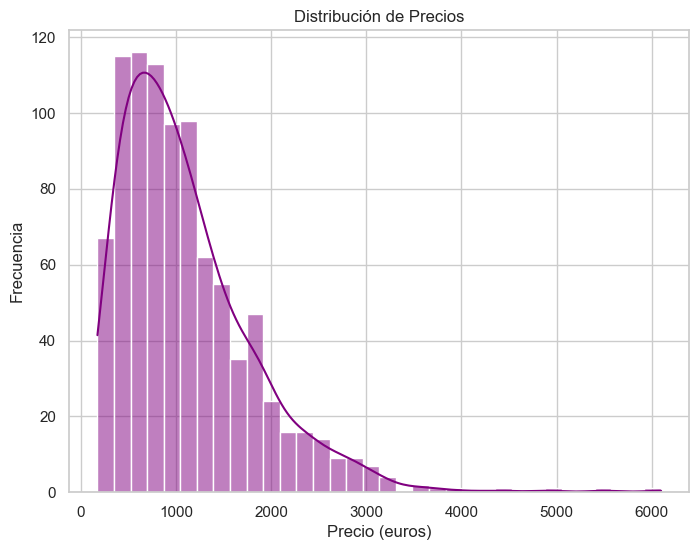

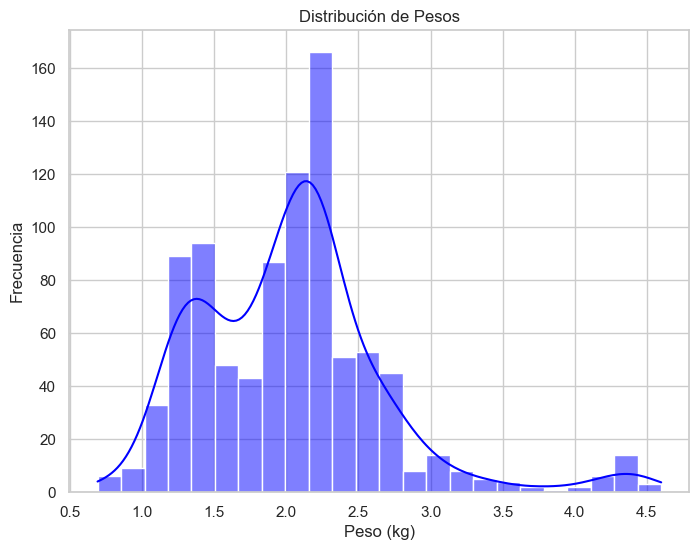

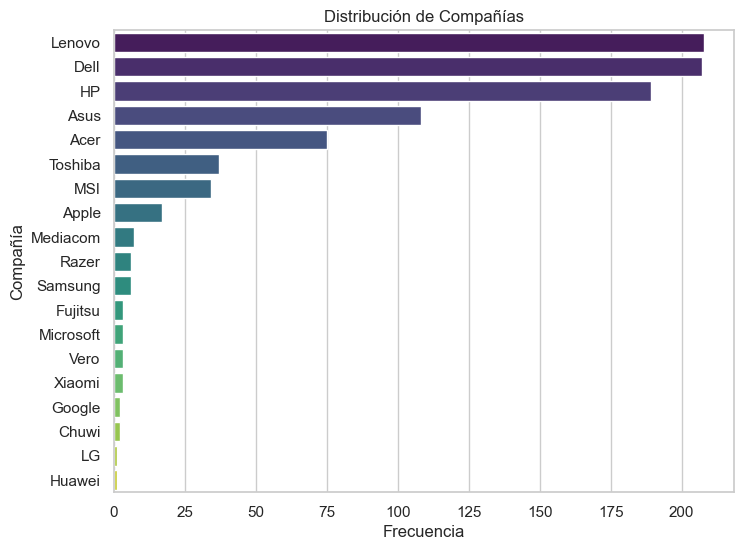

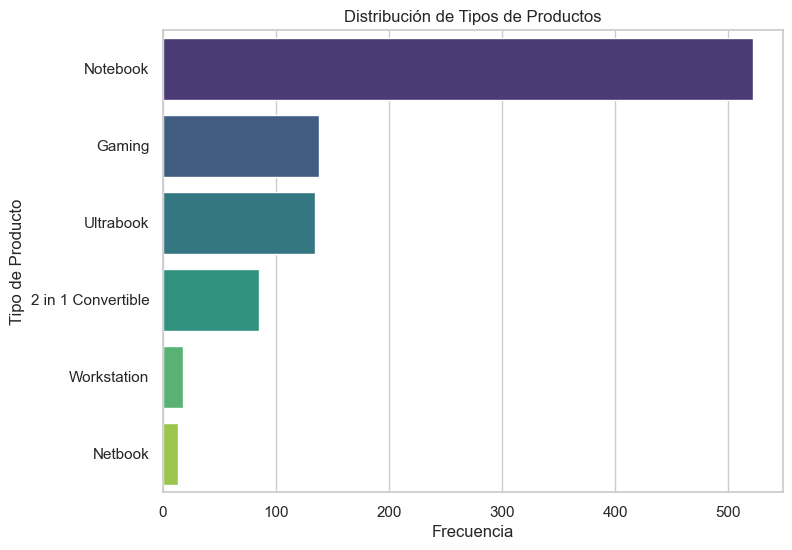

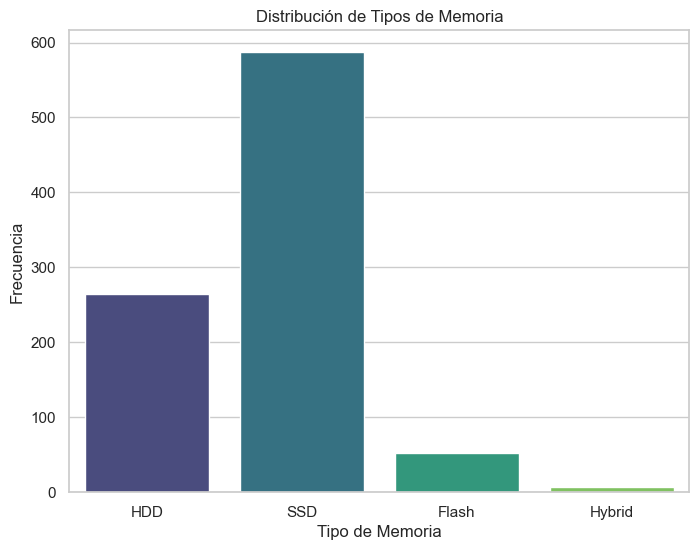

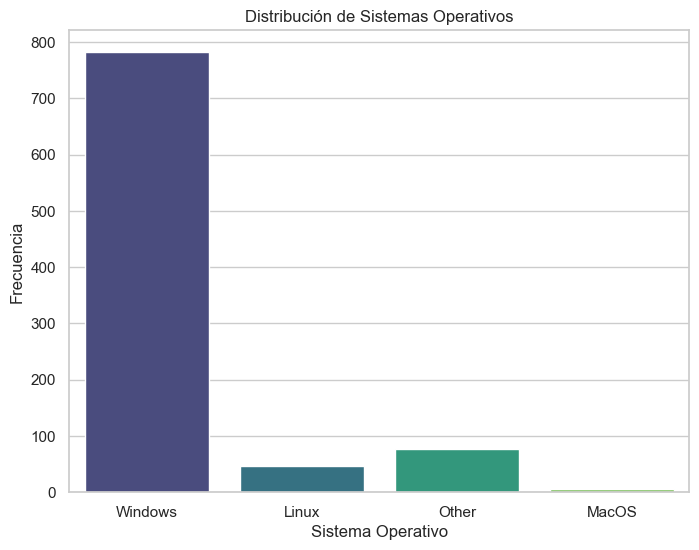

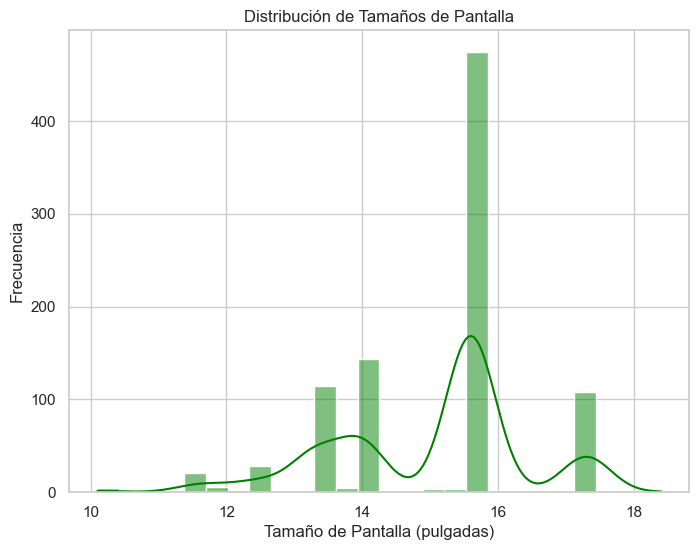

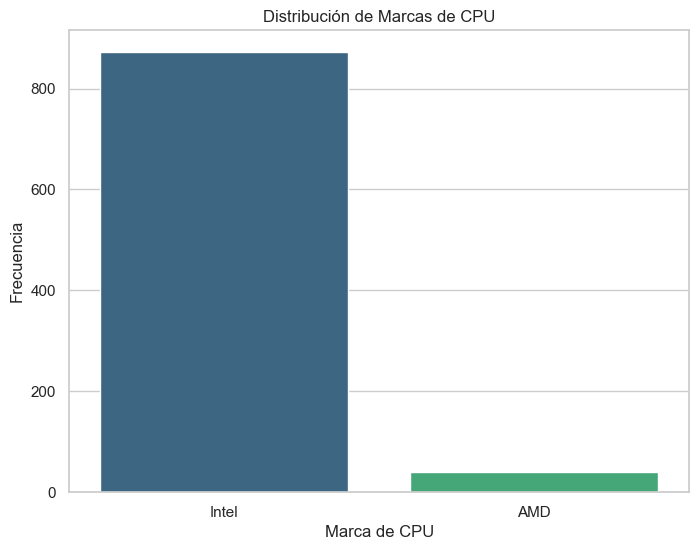

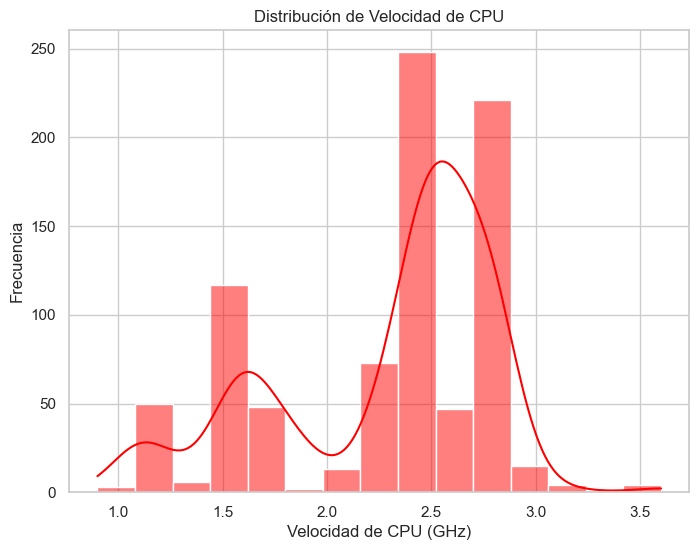

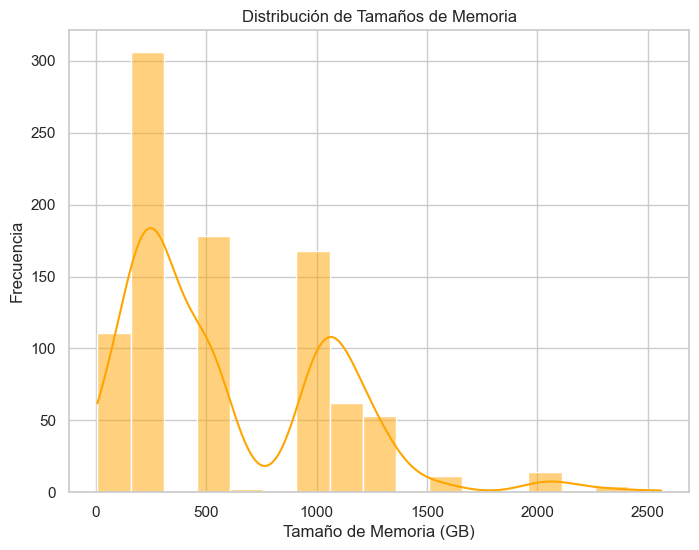

In [29]:
# Histograma de precios
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Price_euros'], kde=True, color='purple')
plt.title('Distribución de Precios')
plt.xlabel('Precio (euros)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de pesos
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Weight'], kde=True, color='blue')
plt.title('Distribución de Pesos')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

# Countplot de compañías
plt.figure(figsize=(8, 6))
sns.countplot(y='Company', data=train_df, palette='viridis', order=train_df['Company'].value_counts().index)
plt.title('Distribución de Compañías')
plt.xlabel('Frecuencia')
plt.ylabel('Compañía')
plt.show()

# Countplot de tipos de productos
plt.figure(figsize=(8, 6))
sns.countplot(y='TypeName', data=train_df, palette='viridis', order=train_df['TypeName'].value_counts().index)
plt.title('Distribución de Tipos de Productos')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Producto')
plt.show()

# Countplot de tipos de memoria
plt.figure(figsize=(8, 6))
sns.countplot(x='Memory_Type', data=train_df, palette='viridis')
plt.title('Distribución de Tipos de Memoria')
plt.xlabel('Tipo de Memoria')
plt.ylabel('Frecuencia')
plt.show()

# Countplot de sistemas operativos
plt.figure(figsize=(8, 6))
sns.countplot(x='OpSys_Category', data=train_df, palette='viridis')
plt.title('Distribución de Sistemas Operativos')
plt.xlabel('Sistema Operativo')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de tamaños de pantalla
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Inches'], kde=True, color='green')
plt.title('Distribución de Tamaños de Pantalla')
plt.xlabel('Tamaño de Pantalla (pulgadas)')
plt.ylabel('Frecuencia')
plt.show()

# Countplot de marcas de CPU
plt.figure(figsize=(8, 6))
sns.countplot(x='Cpu_Brand', data=train_df, palette='viridis', order=train_df['Cpu_Brand'].value_counts().index)
plt.title('Distribución de Marcas de CPU')
plt.xlabel('Marca de CPU')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de velocidad de CPU
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Cpu_Speed'], kde=True, color='red')
plt.title('Distribución de Velocidad de CPU')
plt.xlabel('Velocidad de CPU (GHz)')
plt.ylabel('Frecuencia')
plt.show()


# Histograma de tamaños de memoria
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Memory_Size'], kde=True, color='orange')
plt.title('Distribución de Tamaños de Memoria')
plt.xlabel('Tamaño de Memoria (GB)')
plt.ylabel('Frecuencia')
plt.show()


## ANALISIS CONTRA EL TARGET 

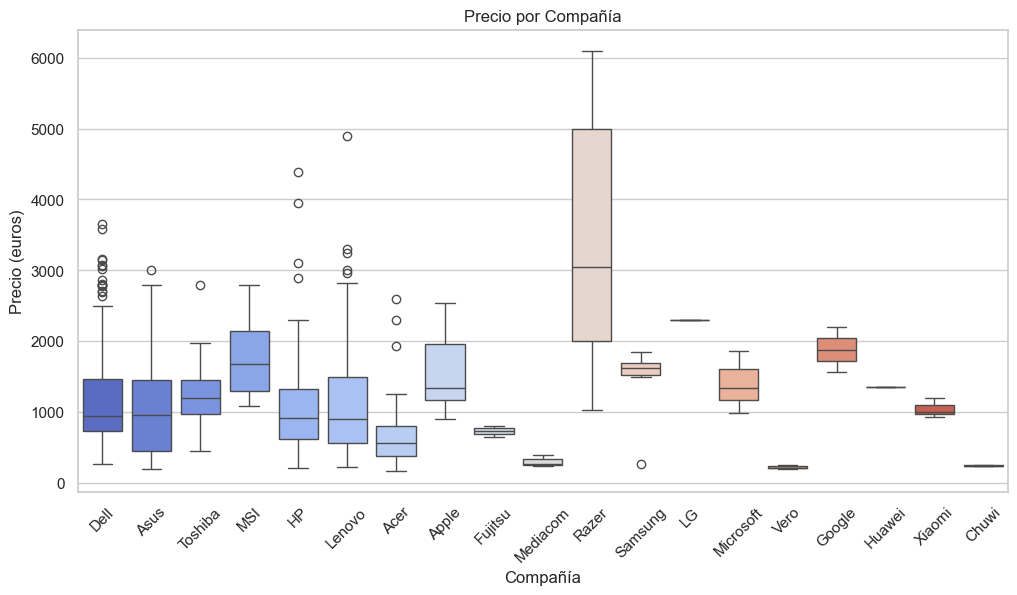

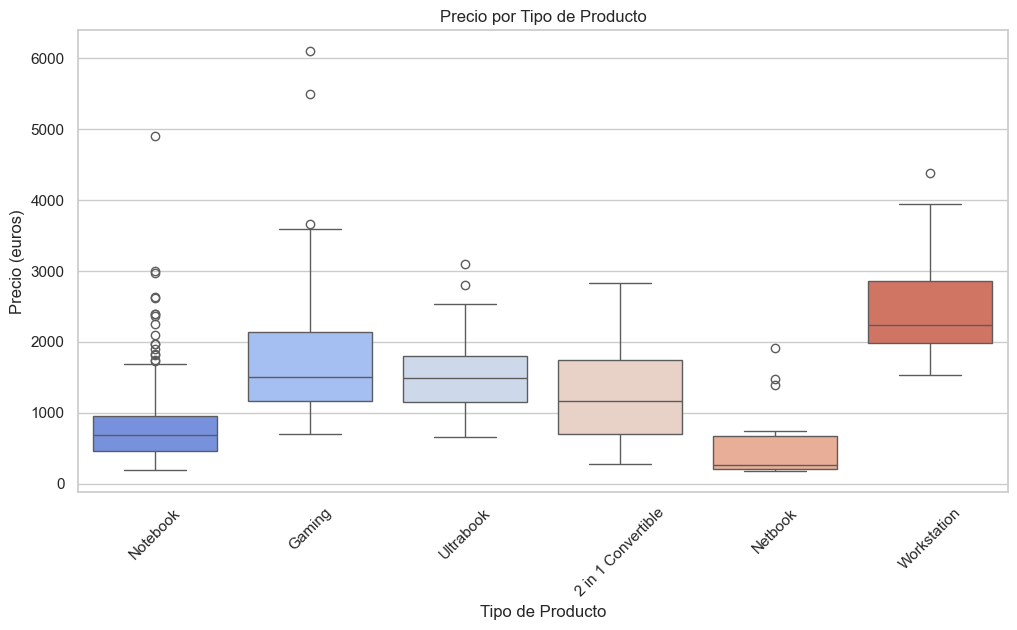

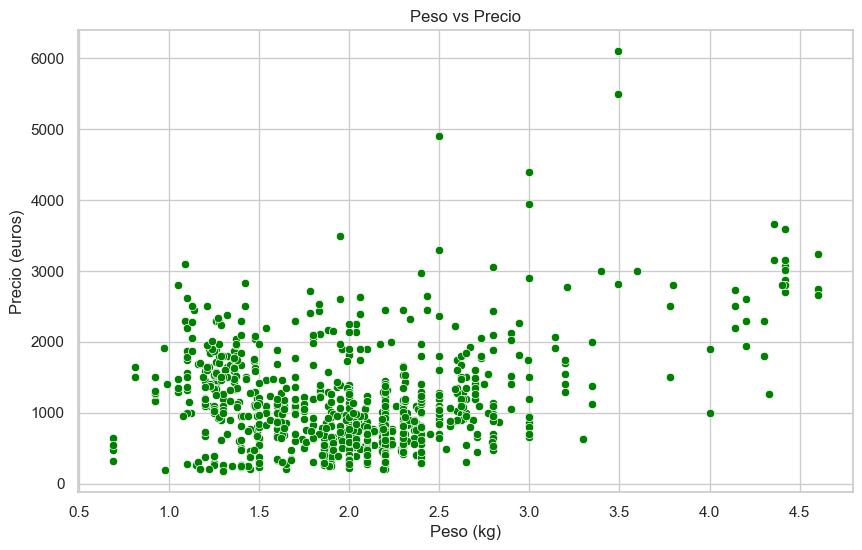

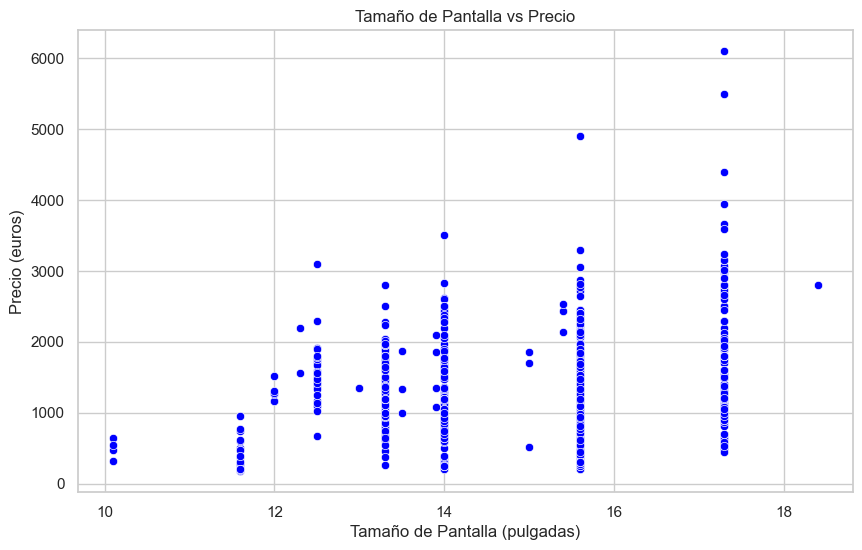

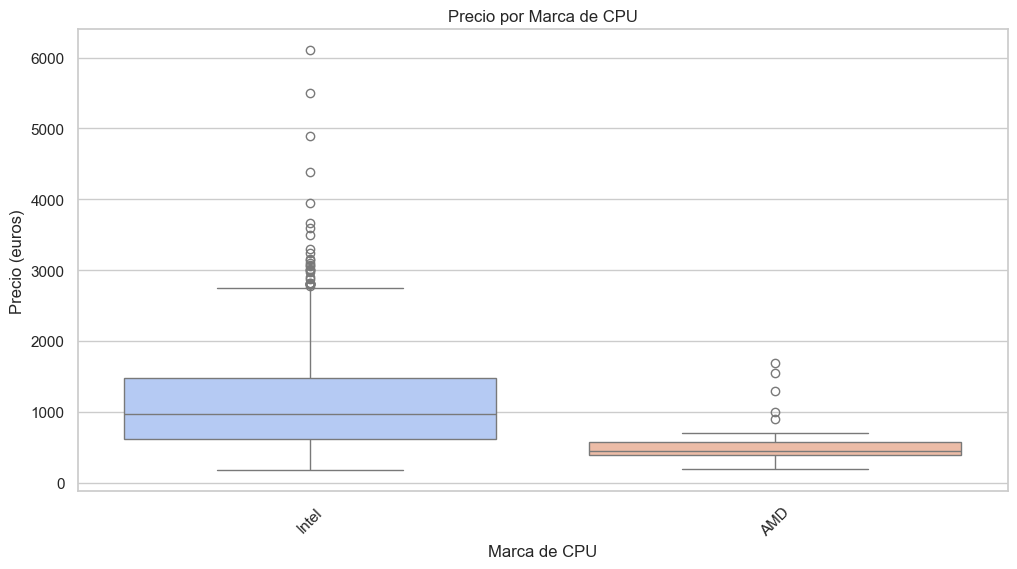

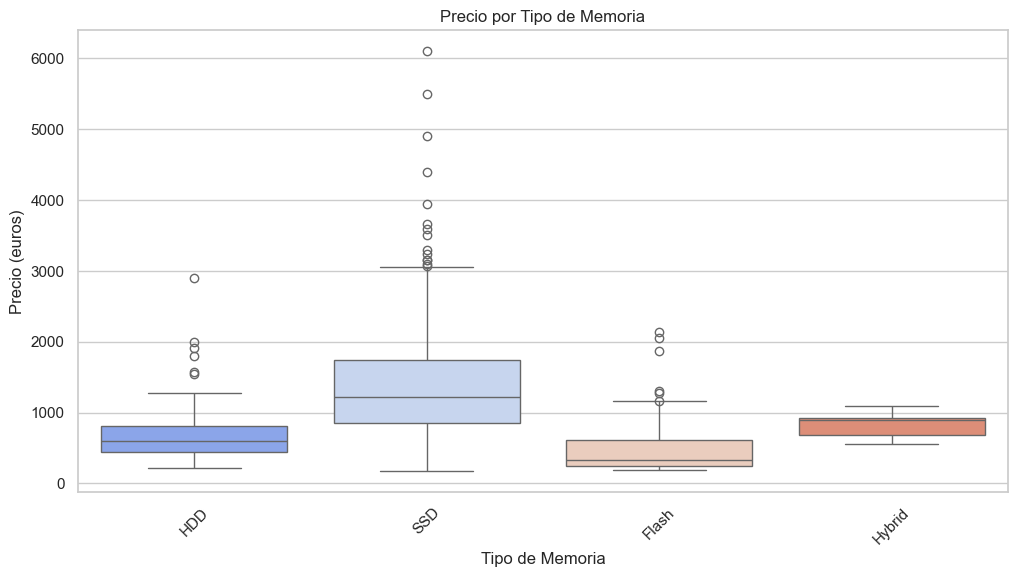

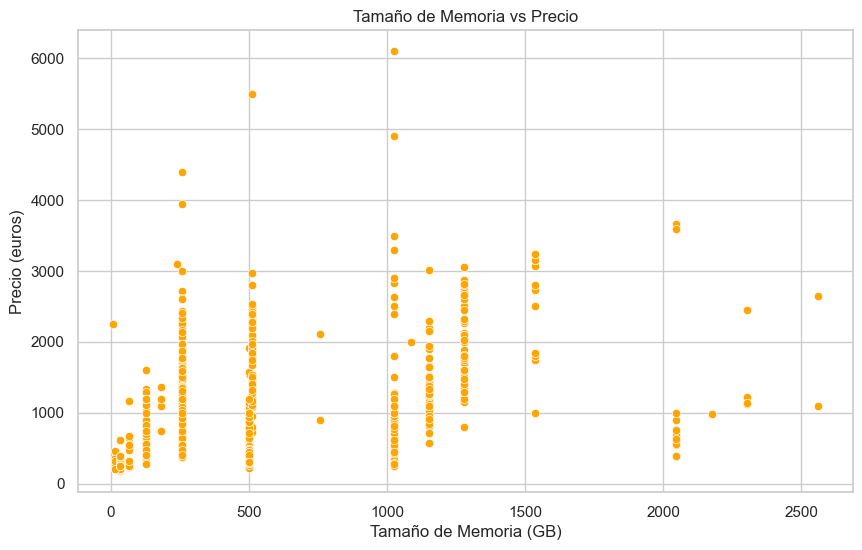

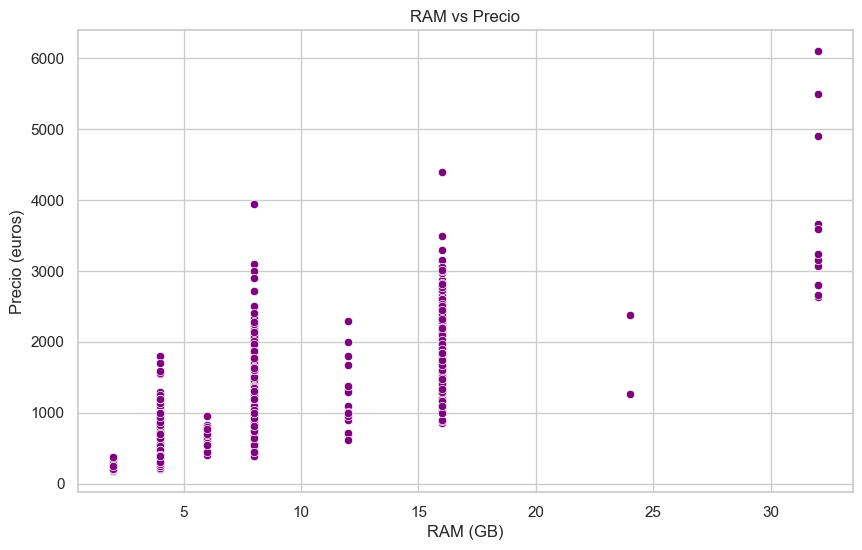

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Precio por Compañía
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=train_df, palette='coolwarm')
plt.title('Precio por Compañía')
plt.xlabel('Compañía')
plt.ylabel('Precio (euros)')
plt.xticks(rotation=45)
plt.show()

# Precio por Tipo de Producto
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price_euros', data=train_df, palette='coolwarm')
plt.title('Precio por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Precio (euros)')
plt.xticks(rotation=45)
plt.show()

# Peso vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Price_euros', data=train_df, color='green')
plt.title('Peso vs Precio')
plt.xlabel('Peso (kg)')
plt.ylabel('Precio (euros)')
plt.show()

# Tamaño de Pantalla vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=train_df, color='blue')
plt.title('Tamaño de Pantalla vs Precio')
plt.xlabel('Tamaño de Pantalla (pulgadas)')
plt.ylabel('Precio (euros)')
plt.show()

# Precio por Marca de CPU
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cpu_Brand', y='Price_euros', data=train_df, palette='coolwarm')
plt.title('Precio por Marca de CPU')
plt.xlabel('Marca de CPU')
plt.ylabel('Precio (euros)')
plt.xticks(rotation=45)
plt.show()

# Precio por Tipo de Memoria
plt.figure(figsize=(12, 6))
sns.boxplot(x='Memory_Type', y='Price_euros', data=train_df, palette='coolwarm')
plt.title('Precio por Tipo de Memoria')
plt.xlabel('Tipo de Memoria')
plt.ylabel('Precio (euros)')
plt.xticks(rotation=45)
plt.show()

# Tamaño de Memoria vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memory_Size', y='Price_euros', data=train_df, color='orange')
plt.title('Tamaño de Memoria vs Precio')
plt.xlabel('Tamaño de Memoria (GB)')
plt.ylabel('Precio (euros)')
plt.show()

# RAM vs Precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=train_df, color='purple')
plt.title('RAM vs Precio')
plt.xlabel('RAM (GB)')
plt.ylabel('Precio (euros)')
plt.show()


Observaciones : vemos como el precio si se relaciona de manera evidente con algunas variables,  
no es el caso de "weight" no parece tener una relacion importante para nuestra sorpresa,  
tambien cabe destacar que a mayor memoria no implica mayor precio, ya que es mas relevante el tipo de memoria,  
es decir es mas cara una ssd que las demas aun teniendo menos memoria.

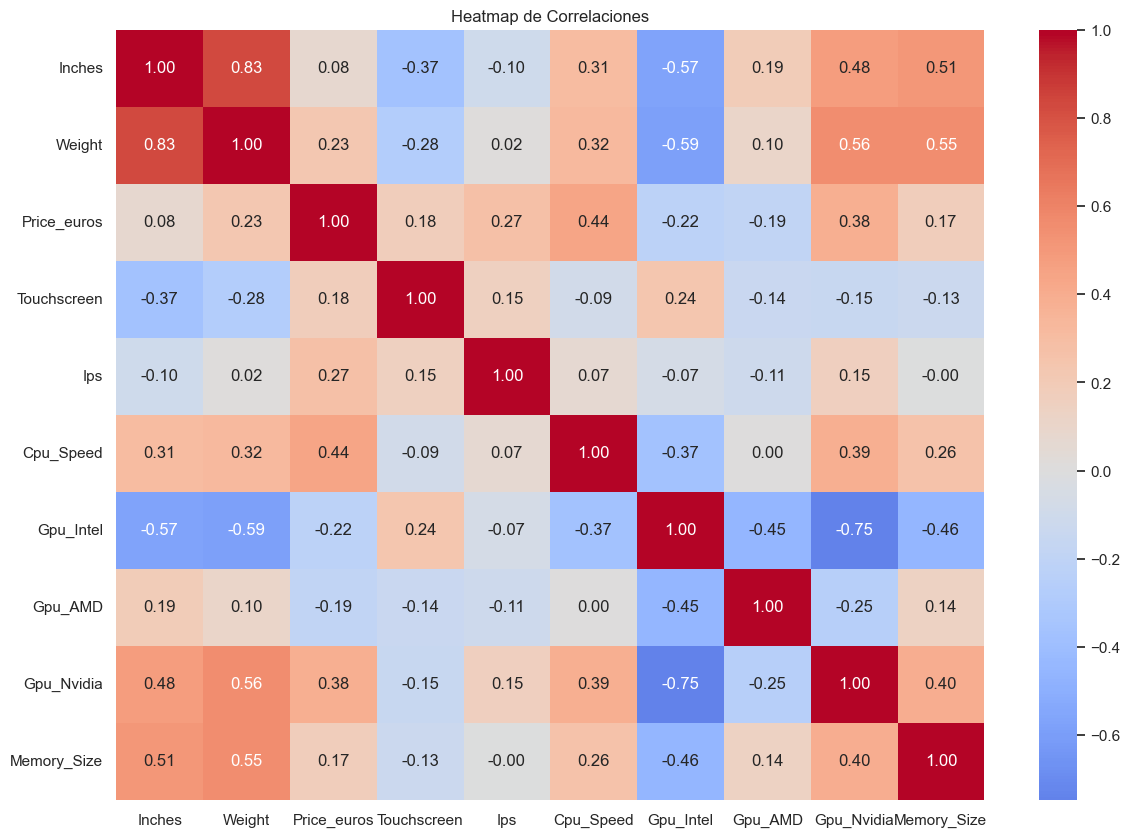

Correlaciones numéricas contra el target (Price_euros):
Price_euros    1.000000
Cpu_Speed      0.440944
Gpu_Nvidia     0.381260
Ips            0.270170
Weight         0.231864
Touchscreen    0.176573
Memory_Size    0.174689
Inches         0.077798
Gpu_AMD       -0.190056
Gpu_Intel     -0.220276
Name: Price_euros, dtype: float64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar el heatmap de correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap de Correlaciones')
plt.show()

# Mostrar correlaciones numéricas contra el target (Price_euros)
target_correlation = correlation_matrix['Price_euros'].sort_values(ascending=False)
print("Correlaciones numéricas contra el target (Price_euros):")
print(target_correlation)


In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Filtrar columnas categóricas
categorical_columns = ['Company', 'TypeName', 'Touchscreen', 'Ips', 'Cpu_Brand', 'Memory_Type', 'OpSys_Category']

# Función para realizar ANOVA y calcular el estadístico F y el p-valor
def anova_test(data, target, categorical_cols):
    anova_results = {}
    for col in categorical_cols:
        groups = [data[target][data[col] == group] for group in data[col].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}
    return anova_results

# Realizar ANOVA
anova_results = anova_test(train_df, 'Price_euros', categorical_columns)

# Mostrar los resultados de ANOVA
anova_df = pd.DataFrame(anova_results).T
print("Resultados de ANOVA:")
print(anova_df)


Resultados de ANOVA:
                   F-Value       P-Value
Company          10.558083  1.601814e-27
TypeName        118.299916  2.496535e-96
Touchscreen      29.285112  7.992138e-08
Ips              71.652831  1.018098e-16
Cpu_Brand        25.770818  4.662253e-07
Memory_Type      96.114483  4.991965e-54
OpSys_Category   18.885090  6.906458e-12


En resumen, todas las variables categóricas analizadas muestran una relación estadísticamente significativa con el   precio de las laptops, lo que sugiere que estas características son importantes determinantes del precio.

## PIPEPLINE

In [40]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Cargar el dataset de entrenamiento
train_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Escritorio\competicion kaggel ML\train.csv")

# Eliminar duplicados y columnas irrelevantes
train_df = train_df.drop_duplicates()
train_df = train_df.drop(columns=['id', 'laptop_ID'])

# Funciones de transformación personalizadas
def convert_weight(df):
    if df['Weight'].dtype == 'object':
        df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
    return df

def transform_screen_resolution(df):
    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
    df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
    resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
    df['Resolution_x'] = resolution[0].astype(int)
    df['Resolution_y'] = resolution[1].astype(int)
    return df.drop(columns=['ScreenResolution'])

def transform_cpu(df):
    df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
    df['Cpu_Speed'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)
    return df.drop(columns=['Cpu'])

def transform_gpu(df):
    df['Gpu_Intel'] = df['Gpu'].apply(lambda x: 1 if 'Intel' in x else 0)
    df['Gpu_AMD'] = df['Gpu'].apply(lambda x: 1 if 'AMD' in x else 0)
    df['Gpu_Nvidia'] = df['Gpu'].apply(lambda x: 1 if 'Nvidia' in x else 0)
    return df.drop(columns=['Gpu'])

def convert_ram(df):
    if df['Ram'].dtype == 'object':
        df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
    return df

def transform_memory(df):
    def extract_memory_type(memory):
        if 'SSD' in memory:
            return 'SSD'
        elif 'HDD' in memory:
            return 'HDD'
        elif 'Hybrid' in memory:
            return 'Hybrid'
        elif 'Flash' in memory:
            return 'Flash'
        else:
            return 'Unknown'

    def extract_memory_size(memory):
        size = 0
        for part in memory.split():
            if 'GB' in part:
                size += int(part.replace('GB', ''))
            elif 'TB' in part:
                size += int(float(part.replace('TB', '')) * 1024)
        return size

    df['Memory_Type'] = df['Memory'].apply(extract_memory_type)
    df['Memory_Size'] = df['Memory'].apply(extract_memory_size)
    return df.drop(columns=['Memory'])

def categorize_os(df):
    def categorize_os_type(os):
        if 'Windows' in os:
            return 'Windows'
        elif 'Mac' in os:
            return 'MacOS'
        elif 'Linux' in os or 'Ubuntu' in os:
            return 'Linux'
        else:
            return 'Other'

    df['OpSys_Category'] = df['OpSys'].apply(categorize_os_type)
    return df.drop(columns=['OpSys'])

# Transformación del target a forma gaussiana
train_df['Price_euros'] = np.log1p(train_df['Price_euros'])

# Separar características y target
X = train_df.drop('Price_euros', axis=1)
y = train_df['Price_euros']

# Definir las columnas categóricas y numéricas
categorical_features = ['Company', 'TypeName', 'Cpu_Brand', 'Memory_Type', 'OpSys_Category', 'Touchscreen', 'Ips']
numerical_features = ['Inches', 'Weight', 'Resolution_x', 'Resolution_y', 'Cpu_Speed', 'Ram', 'Memory_Size']

# Definir el pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear un pipeline completo que incluya las transformaciones personalizadas
full_pipeline = Pipeline(steps=[
    ('convert_weight', FunctionTransformer(convert_weight)),
    ('transform_screen_resolution', FunctionTransformer(transform_screen_resolution)),
    ('transform_cpu', FunctionTransformer(transform_cpu)),
    ('transform_gpu', FunctionTransformer(transform_gpu)),
    ('convert_ram', FunctionTransformer(convert_ram)),
    ('transform_memory', FunctionTransformer(transform_memory)),
    ('categorize_os', FunctionTransformer(categorize_os)),
    ('preprocessor', preprocessor),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el pipeline a los datos de entrenamiento
full_pipeline.fit(X_train)

# Transformar los datos de entrenamiento y prueba
X_train_transformed = full_pipeline.transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)

# Verificar las transformaciones
print(X_train_transformed.shape)
print(X_test_transformed.shape)


(729, 45)
(183, 45)
